In [12]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [13]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [14]:
plt.rc("font", family="Malgun Gothic")

In [15]:
driver_license_type_5_sql = """
    SELECT
        *
    FROM
        `calcium-channel-428804-c3.traffic_accident.driver_license_type_5`
    WHERE
        accident_type = 'accident' AND age_group IN ('all_age', '10')
"""

In [16]:
driver_license_type_5_df = client.query(driver_license_type_5_sql).to_dataframe()
driver_license_type_5_df = driver_license_type_5_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [17]:
driver_license_type_5_df

,accident_type,total,제1종,제2종,연습면허,무면허,국제면허,기타
age_group,,,,,,,,
all_age,accident,211273.6,142449.6,54029.0,88.6,5075.8,107.0,9523.6
10,accident,6890.4,1435.4,3167.6,20.4,1063.0,3.4,1200.6


In [18]:
driver_license_type_5_df = driver_license_type_5_df.drop(columns=["accident_type", "total"])

In [19]:
driver_license_type_5_df

,제1종,제2종,연습면허,무면허,국제면허,기타
age_group,,,,,,
all_age,142449.6,54029.0,88.6,5075.8,107.0,9523.6
10,1435.4,3167.6,20.4,1063.0,3.4,1200.6


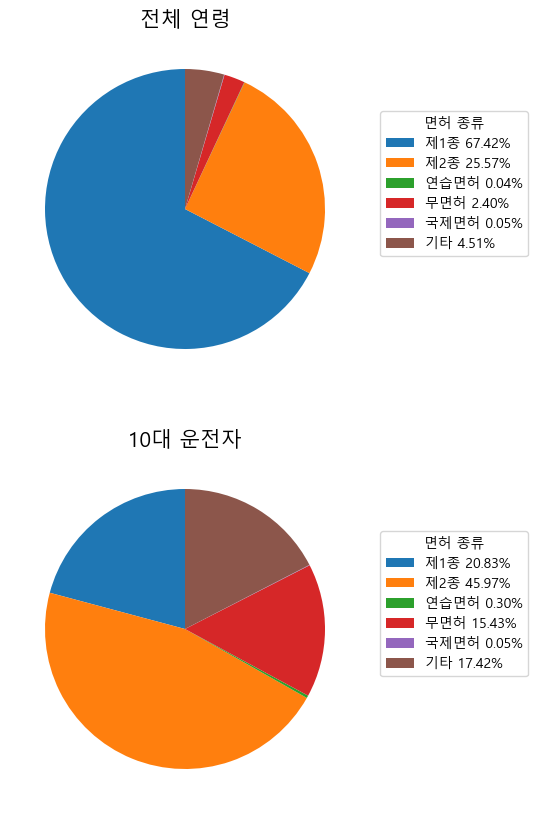

In [34]:
fig, ax = plt.subplots(nrows=len(driver_license_type_5_df), ncols=1, figsize=(5, len(driver_license_type_5_df) * 5))

for i, (index, row) in enumerate(driver_license_type_5_df.iterrows()):
    values = row.values
    labels = row.index
    wedges, texts = ax[i].pie(values, startangle=90)
    legend_labels = [f"{label} {value:.2f}%" for label, value in zip(labels, 100 * values / values.sum())]
    if i == 0:
        ax[i].set_title("전체 연령", size=15)
    else:
        ax[i].set_title("10대 운전자", size=15)
    legend = ax[i].legend(wedges, legend_labels, title="면허 종류", loc="best", bbox_to_anchor=(1, 0, 0.5, 0.8))
    # legend._legend_box.align = "left"
    plt.savefig("./result/driver_license_type_5_v2.png", bbox_inches="tight")

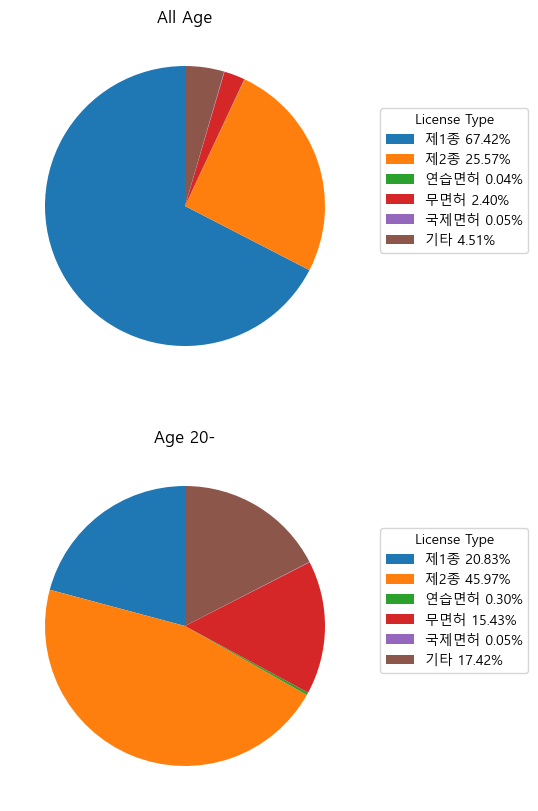

In [21]:
fig, ax = plt.subplots(nrows=len(driver_license_type_5_df), ncols=1, figsize=(5, len(driver_license_type_5_df) * 5))

for i, (index, row) in enumerate(driver_license_type_5_df.iterrows()):
    values = row.values
    labels = row.index
    wedges, texts = ax[i].pie(values, startangle=90)
    legend_labels = [f"{label} {value:.2f}%" for label, value in zip(labels, 100 * values / values.sum())]
    if i == 0:
        ax[i].set_title("All Age")
    else:
        ax[i].set_title("Age 20-")
    ax[i].legend(wedges, legend_labels, title="License Type", loc="best", bbox_to_anchor=(1, 0, 0.5, 0.8))
    plt.savefig("./result/driver_license_type_5_v1.png", bbox_inches="tight")